在這個chapter，主要focus在以下三點：<BR>
1. 如何寫一個好的架構、可讀性高、且其他人可以簡單地使用你的程式碼<BR>
2. python的loops、functions、assignment如何運作<BR>
3. 如何比避開一些程式上撰寫的陷阱

## 4.1   Back to the Basics
### Assignment
我們給 fi 一個值'boo'，並將 fi assign 給 bi，再將 f1 的value覆蓋，並不影響到 bi 的value

In [4]:
fi='boo'
bi = fi
fi='python'
print("bi => "+bi)

bi => boo


但如果被 assign 的資料型態是list就不一樣了

In [7]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
print("bar => ", bar)

bar =>  ['Monty', 'Bodkin']


可以發現當foo的value被改變時，bar的value也一同被改變了，<BR>
這是因為foo的value是一個記憶體位置，所以執行'bar = foo'時，bar是copy到foo的記憶體位置。
<img src="https://i.imgur.com/kux2q1W.jpg" width="600" align="left">

## Equality

python提供兩種方式來比較兩者是否一樣。<BR>
第一種為 '=='，比較兩者之間的value是否一樣。<BR>
第二種為 'is'，比較兩者之間的value是否一樣以及是否為同一個object。

In [5]:
size = 5
python = ['Python']    
snake_nest = [python] * size
snake_nest[3] = ['Python']
print(snake_nest)
print(snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])
print(snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])
print([id(snake) for snake in snake_nest])

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]
True
False
[3149790391752, 3149790391752, 3149790391752, 3149793101704, 3149790391752]


## Conditionals

python的all()以及any()的function，可以被應用在任何的list來檢查是否所有的item或有任何的item符合條件

In [6]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
print(all(len(w) > 4 for w in sent))
print(any(len(w) > 4 for w in sent))

False
True


# 4.2   Sequences

## Operating on Sequence Types
目前有很多種方法來迭代出這些Sequence

In [15]:
s=['dog','cat','bat','cat','bat']
t=['cat']
print("1-------")
for item in s: # 列出所有s裡的item
    print(item)
print("2-------")
for item in sorted(s): # 排序s的item再輸出
    print(item)
print("3-------")
for item in set(s): # 列出s裡不重複的item
    print(item)
print("4-------")
for item in reversed(s):# 排序s之後再reverse輸出
    print(item)
print("5-------")
for item in set(s).difference(t): # 列出s裡不包含t的item
    print(item)

1-------
dog
cat
bat
cat
bat
2-------
bat
bat
cat
cat
dog
3-------
bat
cat
dog
4-------
bat
cat
bat
cat
dog
5-------
bat
dog


另外，python提供zip()可以來配對2組以上的list

In [18]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
ss=['dog','cat','bat','cat']
list(zip(words, tags,ss))

[('I', 'noun', 'dog'),
 ('turned', 'verb', 'cat'),
 ('off', 'prep', 'bat'),
 ('the', 'det', 'cat')]

在一些NLP tasks中，需要切割文件，分成許多個part。<BR>
舉例來說，如果想要訓練一個系統，拿文集其中的90%資料來訓練，剩下的10%拿來測試，可以寫成這樣。

In [1]:
import nltk
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
print(text == training_data + test_data) # 可以檢查資料是否完整
print(len(training_data) / len(test_data))

True
9.0


## 4.3   Questions of Style

這個章節會教你如何寫出一個簡潔的code，而不會太耗費CPU的register<BR>
先看看以下code

In [3]:
import nltk
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total=0
for token in tokens:
    count+=1
    total+=len(token)
print(total/count)

4.401545438271973


In [5]:
import nltk
tokens = nltk.corpus.brown.words(categories='news')
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


上面兩個code的目的都是要算出某篇corpus的平均長度<BR>
但可以很明瞭的看出第二個code比較簡潔，也沒有那麼多的變數宣告以及for loop

## 4.4   Doing More with Functions

### 將函式作為另一個函式的參數來傳遞

In [1]:
#定義一個叫做sent的list
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

def extract_property(prop):
    return [prop(word) for word in sent]

#將函式len作為參數傳遞
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

### 又或者自定義一個函式來當作函式的參數

In [30]:
#將每個詞的最後一個字元輸出
def last_letter(word):
    return word[-1]

extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

### 另一種將函式作為另一個函式的參數來傳遞的方式，叫做lambda expressions
### 以之前的例子來說，若是沒有很多地方需要用到last_letter這個函式，我們可以直接以lambda expressions來表示

In [31]:
extract_property(lambda par:par[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

## Accumulative Functions

### Accumulative Functions為累計函式，在初始化空間之後，透過重複呼叫來累計資料，最後再回傳結果，如函式search1所示： 

In [ ]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

### 而函式 search2 是個產生器，第一次呼叫此函式時會跑到yield的部分然後暫停，並進行處理。
### 當此函式為下一次的input準備好後，會從上次暫停的地方繼續運行，跑到yield的部分的時候再次暫停。 
### 這個方法更加有效率，且不需要為了儲存output而浪費空間

In [ ]:
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
            
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

### 下面是更複雜的產生器例子，輸出詞的排列組合，以list的型態來呈現

In [33]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]
                
list(permutations(['police', 'fish', 'nugget']))

[['police', 'fish', 'nugget'],
 ['fish', 'police', 'nugget'],
 ['fish', 'nugget', 'police'],
 ['police', 'nugget', 'fish'],
 ['nugget', 'police', 'fish'],
 ['nugget', 'fish', 'police']]

## Named Arguments

### 參數太多的時候很容易對呼叫的順序混淆，我們可以以命名的方式來指定參數，並且提供初始值

In [58]:
def repeat(msg='<empty>', num=1):
    return msg * num

repeat(num=3)

'<empty><empty><empty>'

### 這些成為關鍵字參數，當我們將兩種不同類型的參數混在一起，必須確保沒有命名的參數在已命名的參數的前面，因為沒有命名的參數是以位置來定義的
### 我們可以定義擁有任意數量參數的函式，並且使用參數列表*args和字典參數列表**kwargs來使用

In [ ]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [52]:
generic('a','b','c', name ='John', age = '23')

('a', 'b', 'c')
{'name': 'John', 'age': '23'}


## 4.5   Program Development

### Structure of a Python Module

### 程式的模組是為了將邏輯上相關的定義和函式合在一起以方便重用和抽象化，程式的模組就是獨立的.py文件
### 如果要開始學習寫模組，可以參考一些範例，像是NLTK模組
### 输入help()可以輸出有關模組的訊息

In [4]:
import nltk
from nltk.metrics import distance

help(distance)

Help on module nltk.metrics.distance in nltk.metrics:

NAME
    nltk.metrics.distance - Distance Metrics.

DESCRIPTION
    Compute the distance between two items (usually strings).
    As metrics, they must satisfy the following three requirements:
    
    1. d(a, a) = 0
    2. d(a, b) >= 0
    3. d(a, c) <= d(a, b) + d(b, c)

FUNCTIONS
    binary_distance(label1, label2)
        Simple equality test.
        
        0.0 if the labels are identical, 1.0 if they are different.
        
        >>> from nltk.metrics import binary_distance
        >>> binary_distance(1,1)
        0.0
        
        >>> binary_distance(1,3)
        1.0
    
    custom_distance(file)
    
    demo()
    
    edit_distance(s1, s2, substitution_cost=1, transpositions=False)
        Calculate the Levenshtein edit-distance between two strings.
        The edit distance is the number of characters that need to be
        substituted, inserted, or deleted, to transform s1 into s2.  For
        example, transf

## Multi-Module Programs

### 有些程式同時進行多項任務，像是從文集載入data，處理data和將結果視覺化
### 我們可以使用已經存在的模組
### 將工作分成好幾個模組可以讓模組簡單和方便維護

![Imgur](https://i.imgur.com/oewhf8E.png)

## 4.7   A Sample of Python Libraries

### Python有上百個第三方library，有些特定的套件可以延伸python的功能

## Matplotlib
### Matplotlib支援複雜且使用Matlab界面的繪圖函式

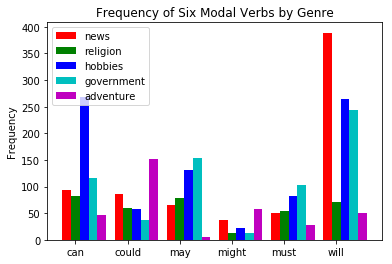

In [7]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in modals)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

## NetworkX

### NetworkX套件是用來定義和操控包含邊和點的結構，稱為圖形(graphs)

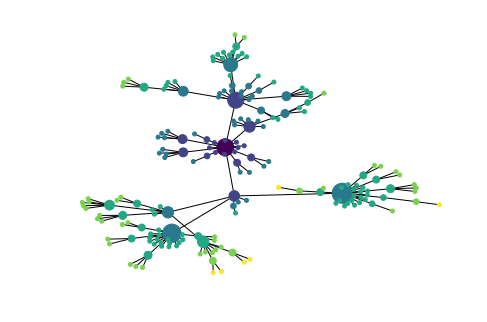

In [18]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child) 
        
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G
def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()
    
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)


### CSV

### 語言分析的工作通常將詞的項目製作成表格，我們可以使用CSV來存取這類格式的文件

In [29]:
import csv
input_file = open("lexicon.csv", "rb")
for row in csv.reader(input_file):
    print(row)

### NumPy

### NumPy套件支援數值處理，可以運用多維陣列的物件，方便的存取和初始化

In [32]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
                [[3,3,3], [4,4,4], [5,5,5]],
                [[6,6,6], [7,7,7], [8,8,8]] ])

cube[1,1,1]

4

In [33]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [36]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])